<a href="https://colab.research.google.com/github/KUNALKEDARI20/KNN/blob/main/Assignment_no_13_KNN_ZOO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**--Implement a KNN model to classify the animals in to categories


In [29]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [30]:
#Import Dataset
zoo=pd.read_csv('/content/Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [31]:
zoo['animal name'].unique

<bound method Series.unique of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object>

In [32]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3])

In [33]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

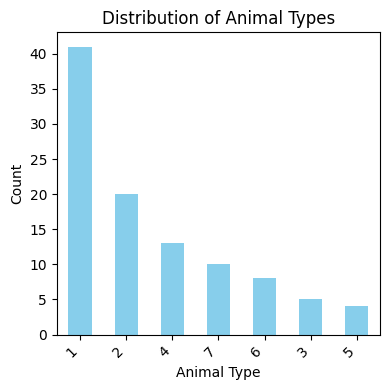

In [34]:

#occurrences of each animal type
type_counts = zoo['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(4,4))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-35-aa3091a7c8c8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = zoo.corr()


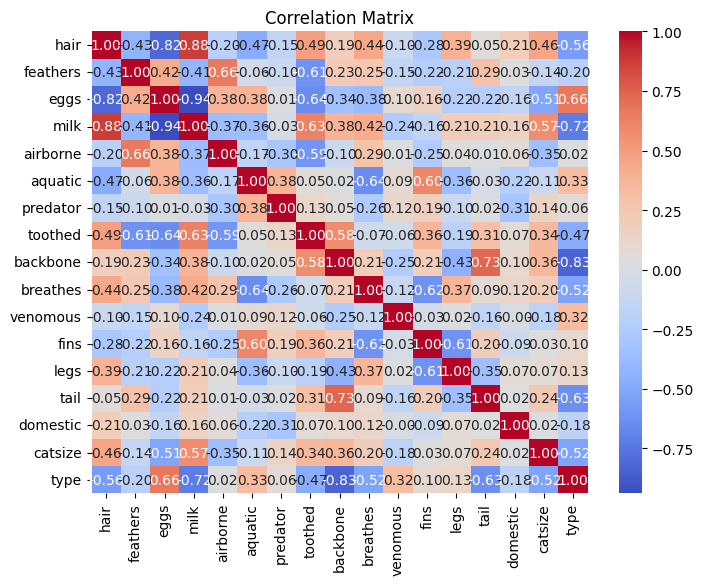

In [35]:
# correlation- correlations between different features in your dataset.

correlation_matrix = zoo.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [36]:
zoo=zoo.iloc[:,1:18]
zoo #'animal name': This feature might not directly contribute to the classification task

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [37]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [38]:
# Spliting the Data into X(feature variable) and Y(target variable)
array=zoo.values
X=array[:,1:17]
Y=array[:,-1]

In [39]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [40]:
X=pd.DataFrame(X)
X.shape

(101, 16)

In [41]:
Y=pd.DataFrame(Y)
Y.shape

from sklearn.preprocessing import LabelEncoder
#For multiclass classification, labels may be encoded using integer values starting from 0.
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 1, 3, 6, 6, 6, 1, 0, 3, 0, 1, 1,
       0, 1, 5, 4, 4, 0, 0, 0, 5, 0, 0, 1, 3, 0, 0, 1, 3, 5, 5, 1, 5, 1,
       0, 0, 6, 0, 0, 0, 0, 5, 4, 6, 0, 0, 1, 1, 1, 1, 3, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 6, 3, 0, 0, 2, 6, 1, 1, 2, 6, 3, 1, 0, 6, 3, 1,
       5, 4, 2, 2, 3, 0, 0, 1, 0, 5, 0, 6, 1])

In [42]:
#KFold validation
num_folds=10
kfold=KFold(n_splits=num_folds)

**Finding the optimum number of K**

In [60]:
#KNN
k_range=range(1,7)
k_scores=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,X,Y,cv=kfold,scoring='accuracy')
  k_scores.append(scores.mean()*100)

pd.Series(k_scores).sort_values(ascending=False)

0    100.0
1     99.0
2     96.0
3     93.0
4     93.0
5     85.0
dtype: float64

So,the optimal value of K=1

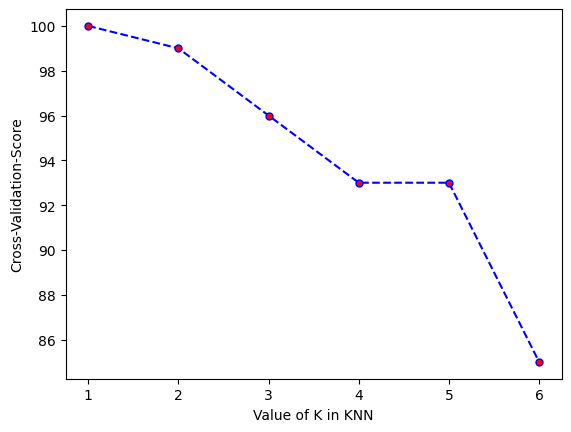

In [61]:
#Visulization of Value of KNN and Cross-Validation Score
plt.plot(k_range,k_scores,color='blue',linestyle='dashed',
         markerfacecolor='red',marker='o',markersize=5)
plt.xlabel('Value of K in KNN')
plt.ylabel('Cross-Validation-Score')
plt.show()


In [45]:
#to create a model of K-Nearest Neighbor with K=1
num_folds=10
kfold=KFold(n_splits=10)
model=KNeighborsClassifier(n_neighbors=1)
result=cross_val_score(model,X,Y,cv=kfold)

In [46]:
result #Perfect accuracy in each fold suggests that the model is likely overfitting to the training data or that the dataset

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [49]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.33,random_state=7)
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(xtrain,ytrain)

In [ ]:
y_pred=A.predict(xtest)
y_pred=pd.DataFrame(y_pred)
y_pred

In [50]:
model.score(xtrain,ytrain)

1.0

In [55]:
model.score(xtest,ytest)

1.0

In [57]:
# print classification report
from sklearn.metrics import classification_report

print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

